https://www.tensorflow.org/tutorials/images/data_augmentation

Text(0.5, 1.0, '(258, 320, 3)')

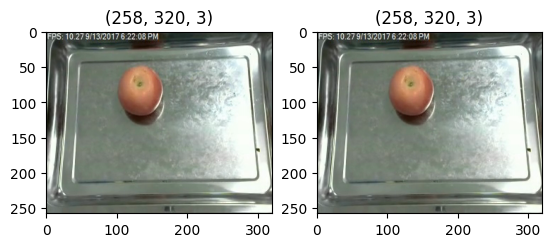

In [106]:
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(150,150),
    layers.Rescaling(1./255)
])
raw = tf.io.read_file('../data/Apple/Apple A/Apple 509.png')
image = tf.image.decode_png(raw, channels=3)
result = resize_and_rescale(image)
fig, axes = plt.subplots(1,2)
axes[0].imshow(image)
axes[0].set_title(image.shape)
axes[1].imshow(result)
axes[1].set_title(result.shape)